\# Welcome to CS 5242 **Homework 1**

ASSIGNMENT DEADLINE ⏰ : **23:59 09 Feb 2024**

In this assignment, the task is to implement Multi-Layer Perceptron (MLP) for predicting the price of houses in Boston from scratch.

Colab is a hosted Jupyter notebook service that requires no setup to use, while providing access free of charge to computing resources including GPUs. In this semester, we will use Colab to run our experiments.


### **Grades Policy**

We have 10 points for this homework. 15% off per day late, 0 scores if you submit it 7 days after the deadline.

### **Cautions**

**DO NOT** use external libraries like PyTorch or TensorFlow in your implementation.

**DO NOT** copy the code from the internet, e.g. GitHub.

Rename the assignment file as "StuID_Name_assignment-1.ipynb". e.g., 'A0100000J_Wang-Wenjie_assignment-1.ipynb'. And submit it to Canvas.


---

### **Contact**

Please feel free to contact us if you have any question about this homework or need any further information.

Slack: Ziming Liu

TA Email: liuziming@comp.nus.edu.sg


## Setup

Start by running the cell below to set up all required software.

In [ ]:
!pip install numpy matplotlib scikit-learn

Import the neccesary library.

In [ ]:
import time

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing


Everything is ready, you can move on and ***Good Luck !*** 😃

## Explore Boston Housing Dataset

One of the first steps when working with a new data set is exploring.The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

First, we download the dataset from the Internet.

In [ ]:
!mkdir -p data \
    && cd data \
    && wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data \
    && ls -l .

total 48
-rw-r--r-- 1 root root 49082 Feb  4 14:26 housing.data


The next thing to do is to reformat the data. Now we reshape the data into a (num_sample, num_features) array.

In [ ]:
datafile = 'data/housing.data'
data = np.fromfile(datafile, sep=' ')
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
print(data.shape)
feature_num = len(feature_names)
data = data.reshape([data.shape[0] // feature_num, feature_num])
print(data.shape)
print(data)

(7084,)
(506, 14)
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.1900e+01]]


One important step of data processing is to rescale the features. In this case, we use minmax scaling. After rescaling, the range of the data will become 0-1.

In [ ]:
# rescale data using minmax scaling.
def scale_data(X):
    X_scaled = None
    #########Enter your code here######### (One point)
    min_val = np.min(X, axis=0)
    max_val = np.max(X, axis=0)
    X_scaled = (X - min_val) / (max_val - min_val)
    #########Code end#########
    return X_scaled


In [ ]:
ratio = 0.8
offset = int(data.shape[0] * ratio)

In [ ]:
x = data[:, :-1]
y = data[:, -1:]
x = scale_data(x)
X_train = x[:offset]
X_test = x[offset:]
Y_train = y[:offset]
Y_test = y[offset:]

An easy to quickly get an idea for how your data looks is to examine the shape of the matrix it's stored using the `.shape` attribute of numpy arrays. We see that the shape of `X_train` is `404 x 13`, which tells us there are `404` samples (images) each with dimension `13`.

In [ ]:
print(f"The shape of the training set is: {X_train.shape[0]} x {X_train.shape[1]}")
print(f"The shape of the test set is: {X_test.shape[0]} x {X_test.shape[1]}")

The shape of the training set is: 404 x 13
The shape of the test set is: 102 x 13


Now lets take a look at how the samples are represented, we can do this by calling `Y_train[index]` and `X_train[index]` (here I choose `index=0` to look at the very first sample). We first notice `Y_train[0]=24`, meaning this entry is a house worthy of 24. The data type of the numpy array is float64 by default.

In [ ]:
index = 0
print(f"Y_train[{index}]: {Y_train[index]}")
print(X_train[index])
print(X_train[index].dtype)

Y_train[0]: [24.]
[0.         0.18       0.06781525 0.         0.31481481 0.57750527
 0.64160659 0.26920314 0.         0.20801527 0.28723404 1.
 0.08967991]
float64


We can also check how related the features are with the house price.

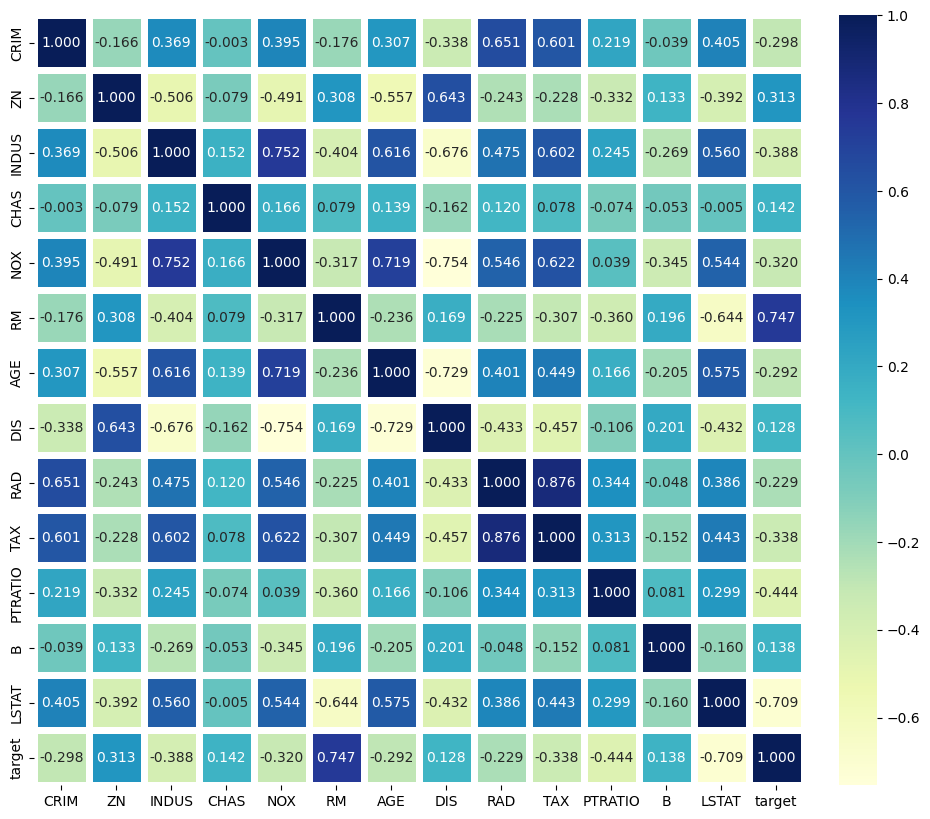

In [ ]:
housedatadf=pd.DataFrame(data=X_train,columns=feature_names[:-1])
housedatadf["target"]=Y_train
datacor=np.corrcoef(housedatadf.values,rowvar=0)
datacor=pd.DataFrame(data=datacor,columns=housedatadf.columns,index=housedatadf.columns)
plt.figure(figsize=(15,10))
ax=sns.heatmap(datacor,square=True,annot=True,fmt=".3f",linewidths=5,cmap="YlGnBu",cbar_kws={"fraction":0.046,"pad":0.03})
plt.show()

## Implementation of Multilayer perceptron

We'll first go through and write the code for each piece of an MLP in generic Python functions. We'll then wrap everything in an `MLP` class, which will allow us to easily access all the MLP functionality in a user friendly manner.

### Training

You have **three tasks** in this section.
1. You need to implement `__init__` function
1. You need to implement `mse_loss` function
2. You need to implement `forward` function.
3. You need to implement `backward` function.
4. You need to implement the main loop of `train` function.

In [ ]:
class MLP(object):
    def __init__(self, num_of_weights, learning_rate=0.01):
        np.random.seed(42)
        self.learning_rate = learning_rate
        # As this is a very simple problem, we only need one linear layer here.
        # Init a linear layer with weight(using standard normal distribution) and bias(to 0).
        #########Enter your code here#########  (One point)
        self.weights = np.random.standard_normal(num_of_weights)
        self.weights = self.weights.reshape((1 ,13))
        # print("weights:", self.weights.shape, "\n")
        self.bias = 0
        #########Code end#########

    def mse_loss(self, y_pred, y):

        #########Enter your code here#########  (One point)
        diff = y_pred - y
        # print("y:", y_pred.shape, y.shape, "\n")
        squared_diff = np.square(diff)
        loss_ = np.mean(squared_diff)
        # print(loss_.shape)
        #########Code end#########
        return loss_

    def forward(self, x):

        #########Enter your code here#########  (Two points)
        out_ = np.dot(x, self.weights.T)
        out_ = out_ + self.bias
        # print("out_", out_.shape, "\n")
        #########Code end#########
        return out_

    def backward(self, x, y_pred, y):

        # Calculate the gradient and update the weight and bias using the gradient.
        #########Enter your code here######### (Two points)
        n = x.shape[0]
        # print("x:", x.shape, "\n")
        # print("y:", y_pred.shape, y.shape, "\n")
        d_loss = 2 * (y_pred - y) / n
        # print("d_loss:", d_loss.shape, "\n")
        d_weights = np.dot(d_loss.T, x)
        # print(d_weights.shape)
        d_bias = np.sum(d_loss)
        # print(d_bias.shape)
        self.weights = self.weights - self.learning_rate * d_weights
        self.bias = self.bias - self.learning_rate * d_bias
        #########Code end#########


    def train(self, X, Y, num_epoches, batch_size):
        n_samples = len(X)
        losses = []
        for epoch_id in range(num_epoches):
            shuffle = np.random.permutation(n_samples)
            X_batches = np.array_split(X[shuffle], n_samples / batch_size)
            Y_batches = np.array_split(Y[shuffle], n_samples / batch_size)
            iter_id = 0
            for batch_x, batch_y in zip(X_batches, Y_batches):
                #########Enter your code here######### (One point)
                y_pred = self.forward(batch_x)
                loss = self.mse_loss(y_pred, batch_y)
                self.backward(batch_x, y_pred, batch_y)
                losses.append(loss)
                #########Code end#########
                print('Epoch {:3d} / iter {:3d}, loss={:4f}'.format(epoch_id + 1, iter_id, loss))
                iter_id += 1
        return losses

Great, now let's give this a try. Let's create a really simple MLP. We'll train with a `batch_size=100` for `epochs=50` and a learning rate `lr=0.1`.

Epoch   1 / iter   0, loss=616.363963
Epoch   1 / iter   1, loss=138.004162
Epoch   1 / iter   2, loss=134.749933
Epoch   1 / iter   3, loss=111.371995
Epoch   2 / iter   0, loss=76.014637
Epoch   2 / iter   1, loss=105.522916
Epoch   2 / iter   2, loss=95.781834
Epoch   2 / iter   3, loss=100.723245
Epoch   3 / iter   0, loss=95.448924
Epoch   3 / iter   1, loss=87.607393
Epoch   3 / iter   2, loss=74.119016
Epoch   3 / iter   3, loss=70.572600
Epoch   4 / iter   0, loss=64.514412
Epoch   4 / iter   1, loss=97.924392
Epoch   4 / iter   2, loss=56.592302
Epoch   4 / iter   3, loss=79.646246
Epoch   5 / iter   0, loss=80.556550
Epoch   5 / iter   1, loss=66.518311
Epoch   5 / iter   2, loss=43.647521
Epoch   5 / iter   3, loss=77.162530
Epoch   6 / iter   0, loss=67.017107
Epoch   6 / iter   1, loss=57.422146
Epoch   6 / iter   2, loss=86.251066
Epoch   6 / iter   3, loss=40.592849
Epoch   7 / iter   0, loss=45.334375
Epoch   7 / iter   1, loss=69.250516
Epoch   7 / iter   2, loss=54.13

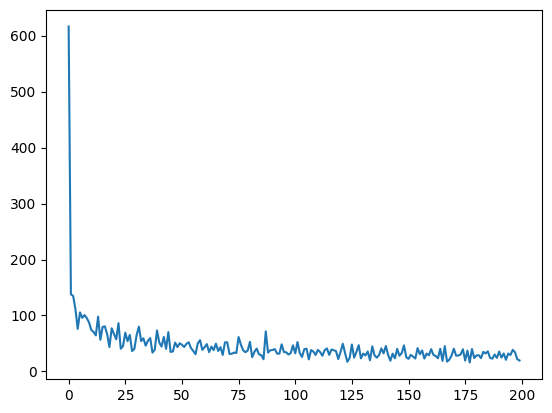

In [ ]:
network = MLP(13, 0.1)
losses = network.train(X_train, Y_train, num_epoches=50, batch_size=100)
# last_20_losses = losses[-20: ]
# average_loss = np.mean(last_20_losses)
# print(average_loss)
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

Now we can check the performance on the test set!

63.67845990469961


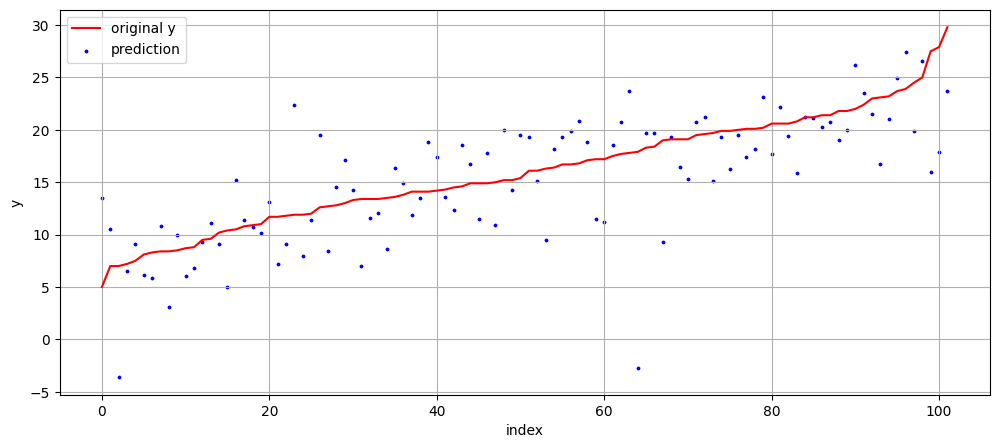

In [ ]:
Y_pred=network.forward(X_test)
n = len(Y_test)
Y_diff = Y_test - Y_pred
squared_Y_diff = np.square(Y_diff)
mse = np.mean(squared_Y_diff)
print(mse)
Y_pred = np.squeeze(Y_pred)
Y_test = np.squeeze(Y_test)
index=np.argsort(Y_test)
plt.figure(figsize=(12,5))
plt.plot(np.arange(len(Y_test)),Y_test[index],"r",label="original y")
plt.scatter(np.arange(len(Y_test)),Y_pred[index],s=3,c="b",label="prediction")
plt.legend(loc="upper left")
plt.grid()
plt.xlabel("index")
plt.ylabel("y")
plt.show()

## Discussion (2 points)

In this section, you are free to choose some of the following directions to explore, and try to summarize some patterns and conclusions.

* Try to use different learning rates and generalize the impact of learning rate on training.
* Try to use different ways of weight initialization and explore the impact on the convergence and final classification performance.
* Try to use a portion of the data for training (e.g., 10%, 20%, 50%) to explore the training convergence and final classification performance with different amounts of data.

> **NOTE:** *Good Disscusion* include experimental setup, presentation of experimental results including visualization, analysis and interpretation of phenomena, and summary of conclusions

Write down your analysis and conclusions:



Epoch   1 / iter   0, loss=616.363963
Epoch   1 / iter   1, loss=537.476159
Epoch   1 / iter   2, loss=524.897870
Epoch   1 / iter   3, loss=481.336356
Epoch   2 / iter   0, loss=332.109730
Epoch   2 / iter   1, loss=385.601699
Epoch   2 / iter   2, loss=320.818981
Epoch   2 / iter   3, loss=366.282190
Epoch   3 / iter   0, loss=314.735755
Epoch   3 / iter   1, loss=245.413339
Epoch   3 / iter   2, loss=200.963937
Epoch   3 / iter   3, loss=219.579332
Epoch   4 / iter   0, loss=155.406073
Epoch   4 / iter   1, loss=238.946418
Epoch   4 / iter   2, loss=145.737927
Epoch   4 / iter   3, loss=201.171165
Epoch   5 / iter   0, loss=169.613098
Epoch   5 / iter   1, loss=154.925430
Epoch   5 / iter   2, loss=115.348296
Epoch   5 / iter   3, loss=163.906909
Epoch   6 / iter   0, loss=136.528438
Epoch   6 / iter   1, loss=124.664150
Epoch   6 / iter   2, loss=174.464889
Epoch   6 / iter   3, loss=89.176140
Epoch   7 / iter   0, loss=110.339736
Epoch   7 / iter   1, loss=133.688387
Epoch   7 / i

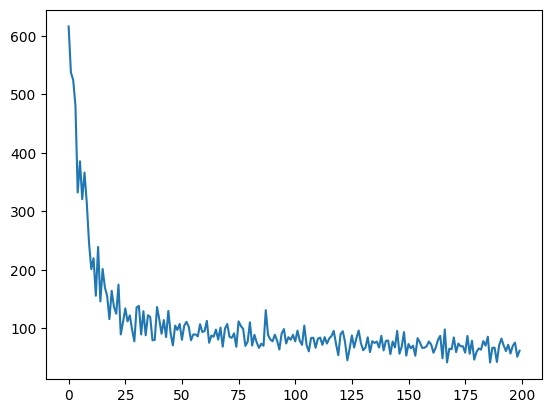

49.98229913747865


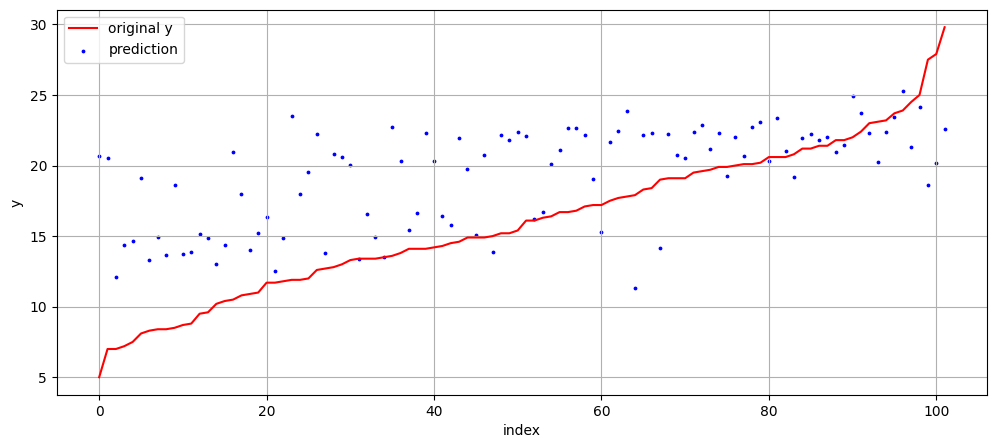

In [ ]:
# === Complete the code (2')
# change the learning rate to 0.01
network = MLP(13, 0.01)
losses = network.train(X_train, Y_train, num_epoches=50, batch_size=100)
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

Y_pred=network.forward(X_test)
n = len(Y_test)
Y_diff = Y_test - Y_pred
squared_Y_diff = np.square(Y_diff)
mse = np.mean(squared_Y_diff)
print(mse)
Y_pred = np.squeeze(Y_pred)
Y_test = np.squeeze(Y_test)
index=np.argsort(Y_test)
plt.figure(figsize=(12,5))
plt.plot(np.arange(len(Y_test)),Y_test[index],"r",label="original y")
plt.scatter(np.arange(len(Y_test)),Y_pred[index],s=3,c="b",label="prediction")
plt.legend(loc="upper left")
plt.grid()
plt.xlabel("index")
plt.ylabel("y")
plt.show()


If we change the learning rate to 0.01, the training process may converge very slowly, the step size of the model parameter update is too small, and more iterations are needed to reach convergence. The num_epoches=50 is so small that the MLP model does not even converge. It looks like the lower mse on test set is just luck.

Epoch   1 / iter   0, loss=616.363963
Epoch   1 / iter   1, loss=537.476159
Epoch   1 / iter   2, loss=524.897870
Epoch   1 / iter   3, loss=481.336356
Epoch   2 / iter   0, loss=332.109730
Epoch   2 / iter   1, loss=385.601699
Epoch   2 / iter   2, loss=320.818981
Epoch   2 / iter   3, loss=366.282190
Epoch   3 / iter   0, loss=314.735755
Epoch   3 / iter   1, loss=245.413339
Epoch   3 / iter   2, loss=200.963937
Epoch   3 / iter   3, loss=219.579332
Epoch   4 / iter   0, loss=155.406073
Epoch   4 / iter   1, loss=238.946418
Epoch   4 / iter   2, loss=145.737927
Epoch   4 / iter   3, loss=201.171165
Epoch   5 / iter   0, loss=169.613098
Epoch   5 / iter   1, loss=154.925430
Epoch   5 / iter   2, loss=115.348296
Epoch   5 / iter   3, loss=163.906909
Epoch   6 / iter   0, loss=136.528438
Epoch   6 / iter   1, loss=124.664150
Epoch   6 / iter   2, loss=174.464889
Epoch   6 / iter   3, loss=89.176140
Epoch   7 / iter   0, loss=110.339736
Epoch   7 / iter   1, loss=133.688387
Epoch   7 / i

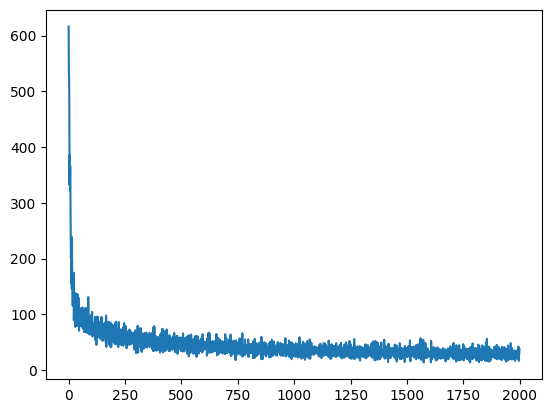

63.70596549804928


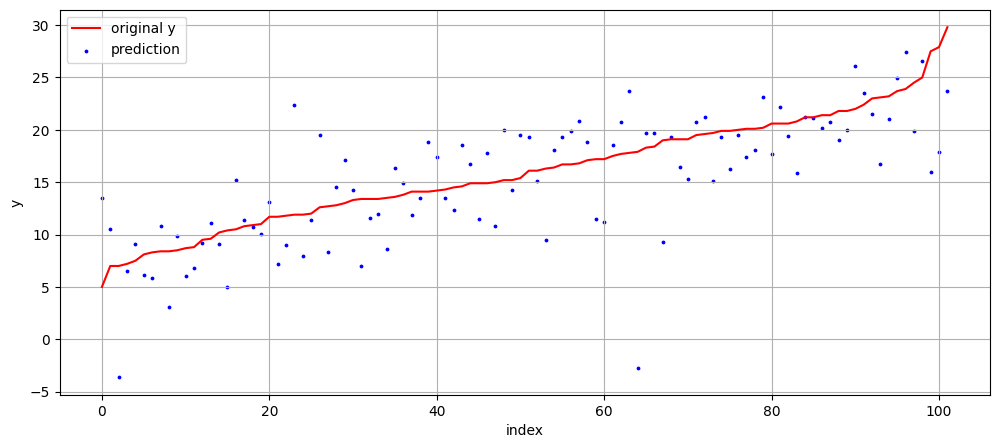

In [ ]:
network = MLP(13, 0.01)
losses = network.train(X_train, Y_train, num_epoches=500, batch_size=100)
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

Y_pred=network.forward(X_test)
n = len(Y_test)
Y_diff = Y_test - Y_pred
squared_Y_diff = np.square(Y_diff)
mse = np.mean(squared_Y_diff)
print(mse)
Y_pred = np.squeeze(Y_pred)
Y_test = np.squeeze(Y_test)
index=np.argsort(Y_test)
plt.figure(figsize=(12,5))
plt.plot(np.arange(len(Y_test)),Y_test[index],"r",label="original y")
plt.scatter(np.arange(len(Y_test)),Y_pred[index],s=3,c="b",label="prediction")
plt.legend(loc="upper left")
plt.grid()
plt.xlabel("index")
plt.ylabel("y")
plt.show()

We now set the num_epoches to 500, to meet the requirement of decreasing of learning rate. The MLP model seems to converge in this situation. But a decrease in the learning rate does not necessarily lead to a decrease in the MSE.


Epoch   1 / iter   0, loss=616.363963
Epoch   1 / iter   1, loss=649.771931
Epoch   1 / iter   2, loss=837.278520
Epoch   1 / iter   3, loss=1023.613197
Epoch   2 / iter   0, loss=1104.292923
Epoch   2 / iter   1, loss=1318.799713
Epoch   2 / iter   2, loss=1620.950712
Epoch   2 / iter   3, loss=1760.602551
Epoch   3 / iter   0, loss=1907.956376
Epoch   3 / iter   1, loss=2408.947332
Epoch   3 / iter   2, loss=3087.356703
Epoch   3 / iter   3, loss=4004.323607
Epoch   4 / iter   0, loss=4542.649348
Epoch   4 / iter   1, loss=5408.222007
Epoch   4 / iter   2, loss=6569.269233
Epoch   4 / iter   3, loss=7778.897285
Epoch   5 / iter   0, loss=8857.656541
Epoch   5 / iter   1, loss=10812.207828
Epoch   5 / iter   2, loss=11932.779303
Epoch   5 / iter   3, loss=14679.018891
Epoch   6 / iter   0, loss=20459.514396
Epoch   6 / iter   1, loss=27860.720313
Epoch   6 / iter   2, loss=35406.828380
Epoch   6 / iter   3, loss=41202.079241
Epoch   7 / iter   0, loss=47041.965162
Epoch   7 / iter   1

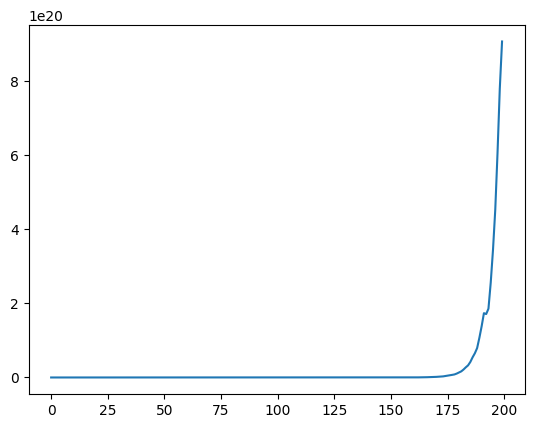

1.3618396973849811e+21


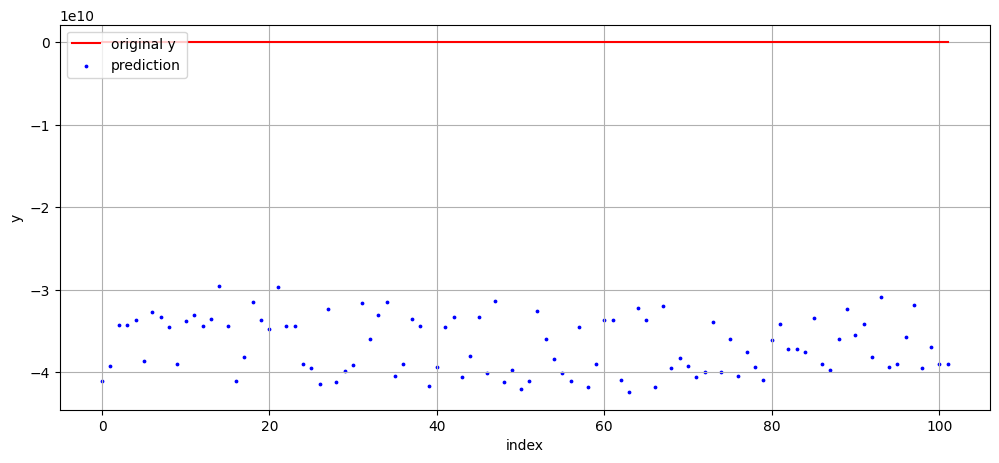

In [ ]:
network = MLP(13, 0.3)
losses = network.train(X_train, Y_train, num_epoches=50, batch_size=100)
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()

Y_pred=network.forward(X_test)
n = len(Y_test)
Y_diff = Y_test - Y_pred
squared_Y_diff = np.square(Y_diff)
mse = np.mean(squared_Y_diff)
print(mse)
Y_pred = np.squeeze(Y_pred)
Y_test = np.squeeze(Y_test)
index=np.argsort(Y_test)
plt.figure(figsize=(12,5))
plt.plot(np.arange(len(Y_test)),Y_test[index],"r",label="original y")
plt.scatter(np.arange(len(Y_test)),Y_pred[index],s=3,c="b",label="prediction")
plt.legend(loc="upper left")
plt.grid()
plt.xlabel("index")
plt.ylabel("y")
plt.show()
# === Complete the code

If the learning rate is too large, it may lead to unstable training, and the training may cross the optimal solution, causing the model to oscillate in the parameter space or even fail to converge.